Avacado Project
Problem Statement:

Avocado is a fruit consumed by people heavily in the United States.

Content -

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

Average Price - The average price of a single avocado

Type - Whether it is conventional or organic

Year - The year information

Region - The city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Two Target variables are taken in account separately. Two Models are created. One is Regression for AveragePrice Prediction and another is Classification for Region Prediction

# Importing required Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
import pickle
import datetime
import scipy
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [5]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv")
df=pd.DataFrame(data)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
df.shape

(16468, 14)

In [7]:
df.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.8+ MB


# EDA Process

In [10]:
#checkinh the null values
df.isnull()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16464,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16465,True,True,True,True,True,True,True,True,True,True,True,True,True,True
16466,True,True,True,True,True,True,True,True,True,True,True,True,True,True


<AxesSubplot:>

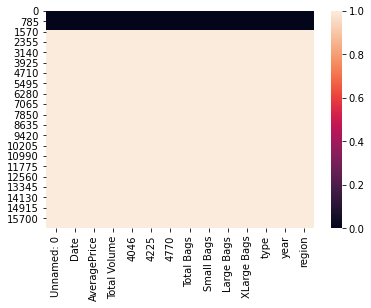

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

There is a huge number of rows- 14951 having null values, that means number of rows having values = 16468-14951 = 1517 rows have values

In [13]:
df=df.iloc[:1517,:]
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10.0,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,11.0,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,12.0,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,13.0,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


In [14]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


There are huge differences between 75% and max values of all columns. Let's drop the unnamed column which is like index.

In [15]:
df=df.drop(['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte


# Visulisation Of Data- Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

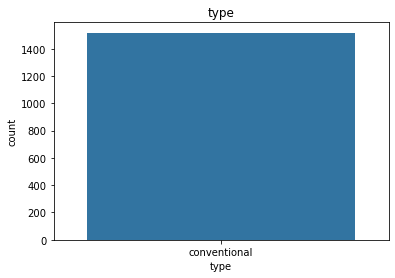

In [17]:
sns.countplot(x='type', data=df)
plt.title('type')
plt.show

There is only one type of Avocado ie conventional. So we can drop this column as it is same in every rows.

In [18]:
df.drop(['type'],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte


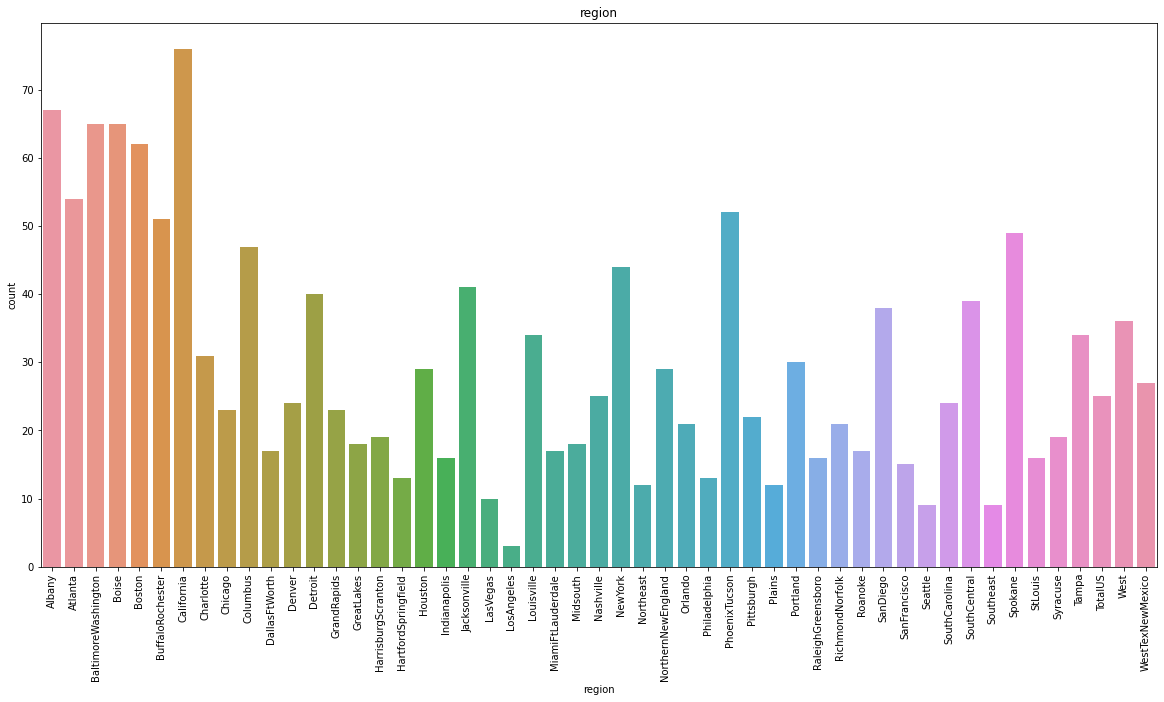

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

In the dataset, California region has highest datas(rows).

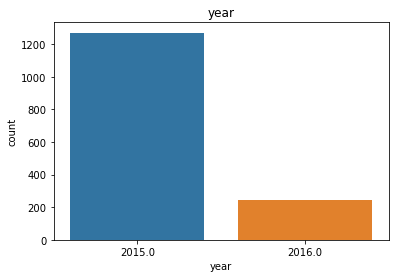

In [21]:
sns.countplot(x='year',data=df)
plt.title('year')
plt.show()

More than 1200 datas collected in 2015.

# Bivariate Analysis

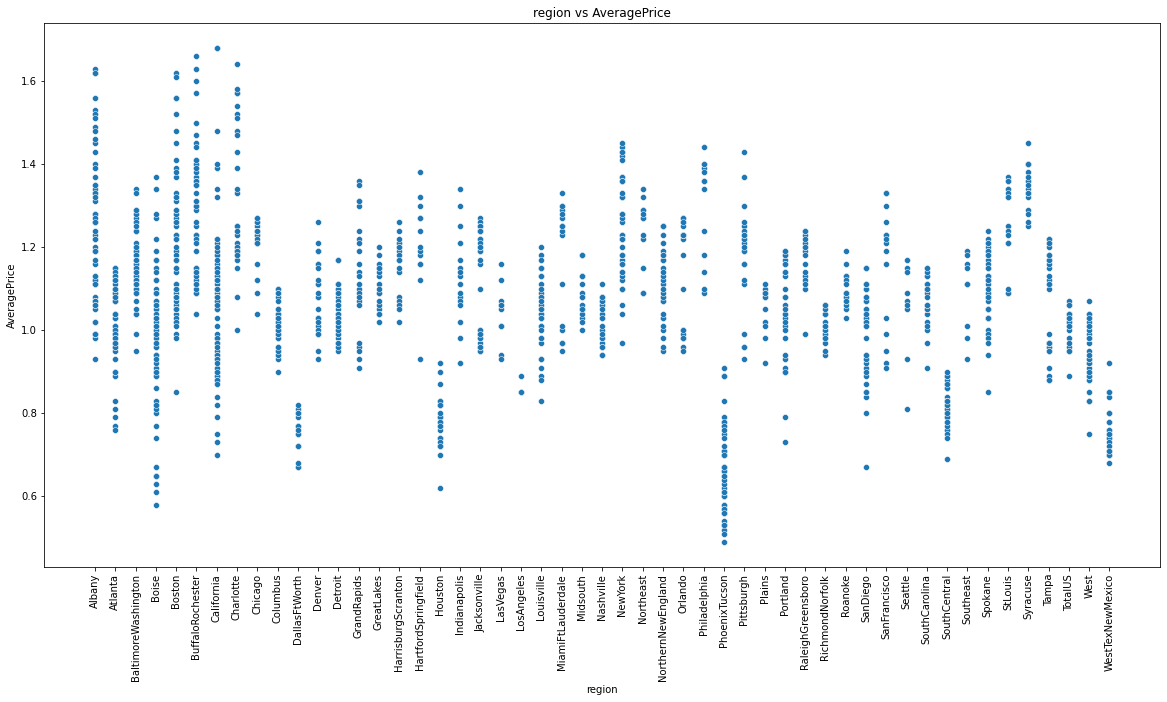

In [22]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.scatterplot(x=df['region'],y=df['AveragePrice'],data=df)
plt.title('region vs AveragePrice')
plt.show()

Region and Average price are having some relationship that varies. PhoenixTuscon is having less Average Price whereas California is having highest Average Price.

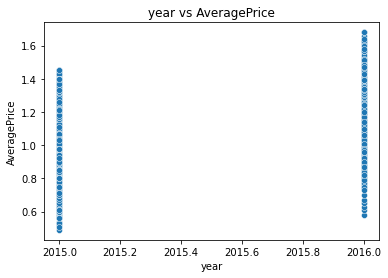

In [23]:
sns.scatterplot(x=df['year'],y=df['AveragePrice'],data=df)
plt.title('year vs AveragePrice')
plt.show()

Averageprice increased a little in 2016.

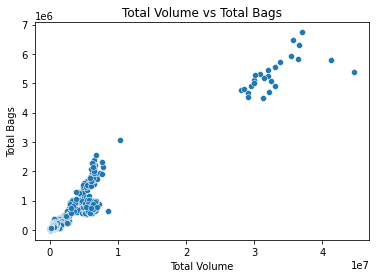

In [24]:
sns.scatterplot(x=df['Total Volume'],y=df['Total Bags'],data=df)
plt.title('Total Volume vs Total Bags')
plt.show()

Total Volume is related to Total Bags in linear

# Label Encoding- the only object type data is region, so we shall encode the same into numeric

In [25]:
le=LabelEncoder()
list1=['region']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df   

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


# Let us convert dates into datestamp

In [26]:
for i in range(0,1517):
    df['Date'][i]=datetime.datetime.strptime(df['Date'][i],'%d-%m-%Y')
df    

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,2015-12-06 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16 00:00:00,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,2016-10-09 00:00:00,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,2016-10-02 00:00:00,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,2016-09-25 00:00:00,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


# To process further the data we need to encode Years and  Datestamps

In [27]:
df['Year_encoded']=df['year']-2015
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Year_encoded
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0,0.0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0,0.0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0,0.0
3,2015-12-06 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0,0.0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16 00:00:00,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7,1.0
1513,2016-10-09 00:00:00,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7,1.0
1514,2016-10-02 00:00:00,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7,1.0
1515,2016-09-25 00:00:00,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7,1.0


In [28]:
df.drop(['year'],axis=1,inplace=True)
df


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0.0
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0.0
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0.0
3,2015-12-06 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0.0
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16 00:00:00,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,1.0
1513,2016-10-09 00:00:00,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,1.0
1514,2016-10-02 00:00:00,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,1.0
1515,2016-09-25 00:00:00,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,1.0


In [29]:
df['Date_encoded']=df['Date']-df['Date'].min()
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded,Date_encoded
0,2015-12-27 00:00:00,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0.0,357 days
1,2015-12-20 00:00:00,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0.0,350 days
2,2015-12-13 00:00:00,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0.0,343 days
3,2015-12-06 00:00:00,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0.0,336 days
4,2015-11-29 00:00:00,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0.0,329 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16 00:00:00,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,1.0,651 days
1513,2016-10-09 00:00:00,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,1.0,644 days
1514,2016-10-02 00:00:00,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,1.0,637 days
1515,2016-09-25 00:00:00,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,1.0,630 days


In [30]:
for i in range(0,1517):
    df["Date_encoded"][i]=df["Date_encoded"][i].days

In [31]:
df["Date_encoded"]=(df["Date_encoded"]).astype(int)

In [32]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
region            int32
Year_encoded    float64
Date_encoded      int32
dtype: object

In [33]:
F=df['Date_encoded'].values

In [34]:
df['Date']=F

In [35]:
df.drop(['Date_encoded'],axis=1,inplace=True)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,357,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0.0
1,350,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0.0
2,343,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0.0
3,336,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0.0
4,329,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,651,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,1.0
1513,644,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,1.0
1514,637,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,1.0
1515,630,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,1.0


# Multivariate Analysis

Correlation

In [36]:
df_corr=df.corr()
df_corr

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
Date,1.000000,0.186404,-0.059179,-0.087729,-0.062581,-0.023009,0.021604,0.032893,-0.054420,0.202669,-0.377277,0.794061
AveragePrice,0.186404,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,-0.229408,0.178683
Total Volume,-0.059179,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,0.236579,-0.004189
4046,-0.087729,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,0.269481,-0.040439
4225,-0.062581,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,0.215733,-0.007254
4770,-0.023009,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.138092,0.029222
Total Bags,0.021604,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.190001,0.090108
Small Bags,0.032893,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.168650,0.106382
Large Bags,-0.054420,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,0.297452,-0.018678
XLarge Bags,0.202669,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,-0.046144,0.218342


<AxesSubplot:>

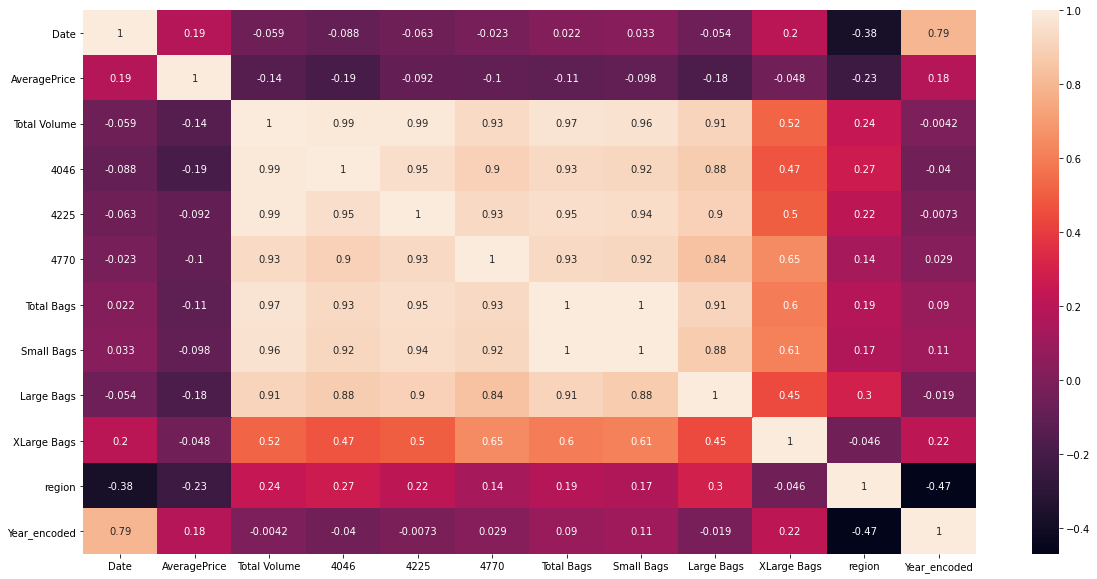

In [37]:
plt.figure(figsize=(20,10))
sns.heatmap(df_corr,annot=True)

Averageprice is positively correlated with Year_encoded and Date while negatively correlated with region,total bags,total volume.Region is positively correlated with Bags,Volume while negatively correlated with Date,Year_encoded and Averageprice.

# Check of Outliers

In [38]:
df.shape

(1517, 12)

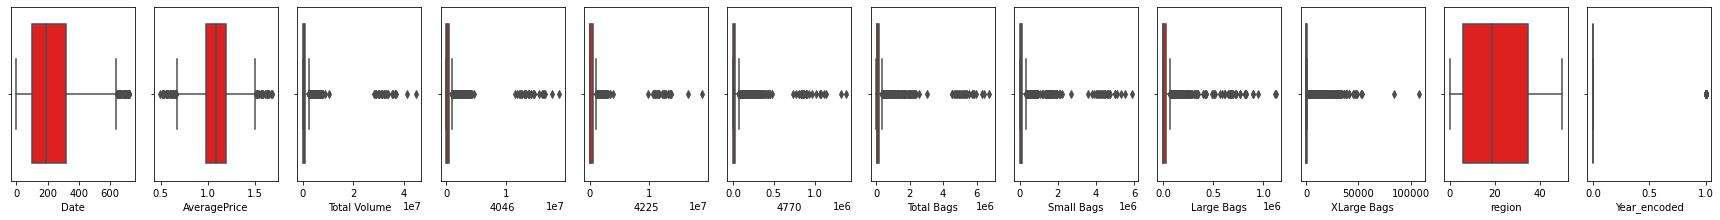

In [39]:
collist=df.columns.values
ncol=12
nrows=20

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='red',orient='h')
    plt.tight_layout()

There so much outliers in Volume and Bags.

# Removal of Outliers - Z score Method

In [40]:
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,357,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,0,0.0
1,350,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,0,0.0
2,343,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,0,0.0
3,336,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,0,0.0
4,329,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,651,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,7,1.0
1513,644,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,7,1.0
1514,637,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,7,1.0
1515,630,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,7,1.0


In [41]:
new_df.shape

(1436, 12)

In [42]:
Percentage= (1517-1436)*100/1517
Percentage

5.339485827290705

# Checking Skewness

In [43]:
new_df.skew()

Date            1.064255
AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
region          0.276276
Year_encoded    2.004439
dtype: float64

There are so much skewness. It is needed to be removed.

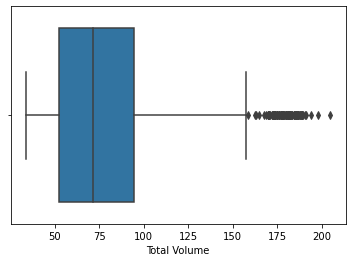

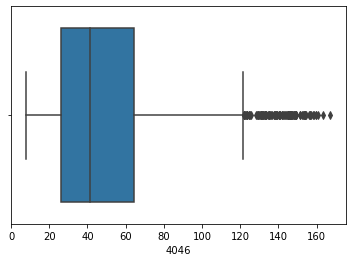

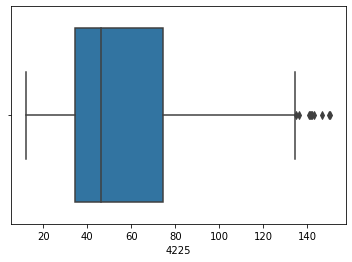

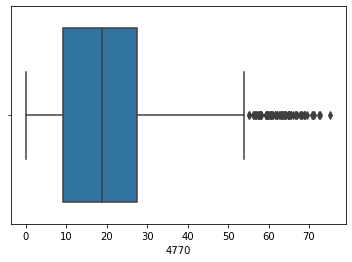

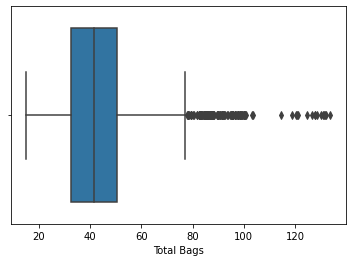

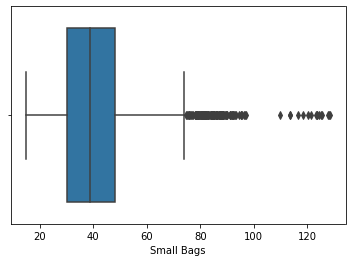

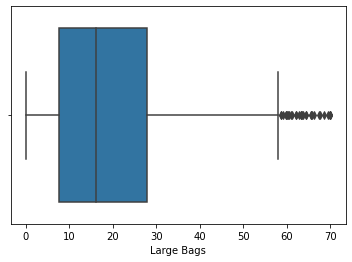

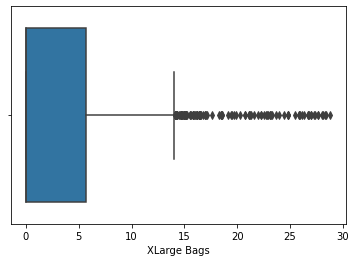

In [48]:
list2=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

for l in list2:
    sns.boxplot(new_df[l])
    plt.show()

In [49]:
list2=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for v in list2:
    new_df[v]=np.cbrt(new_df[v])

In [50]:
new_df.skew()

Date            1.064255
AveragePrice   -0.184770
Total Volume    0.757213
4046            0.231052
4225            0.369606
4770            0.021209
Total Bags      0.777719
Small Bags      0.787978
Large Bags     -1.020543
XLarge Bags     0.552869
region          0.276276
Year_encoded    2.004439
dtype: float64

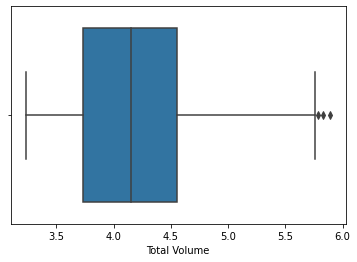

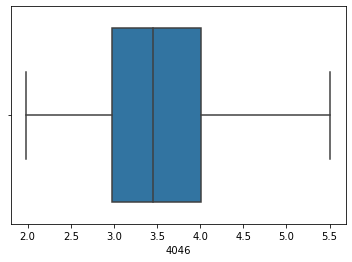

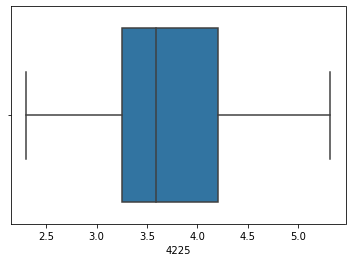

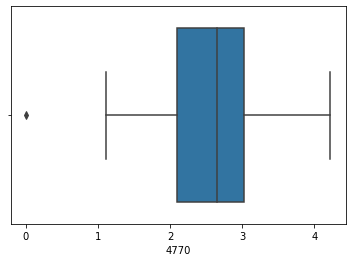

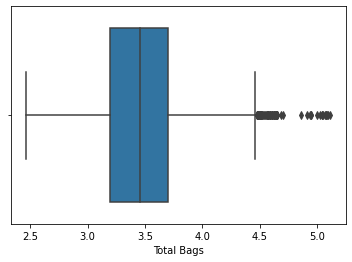

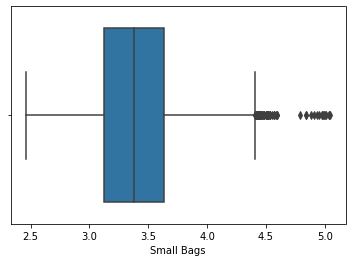

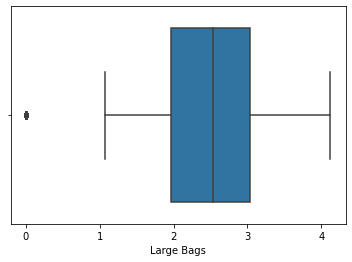

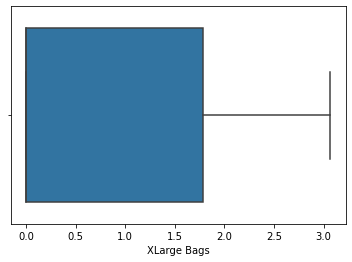

In [51]:
for l in list2:
    sns.boxplot(new_df[l])
    plt.show()

In [52]:
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,357,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.000000,0,0.0
1,350,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.000000,0,0.0
2,343,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.000000,0,0.0
3,336,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.000000,0,0.0
4,329,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,651,1.39,3.861380,3.379686,3.372030,2.961667,3.391843,3.318630,2.793355,1.838756,7,1.0
1513,644,1.51,3.832162,3.274871,3.343305,2.995512,3.415780,3.360831,2.736196,0.000000,7,1.0
1514,637,1.48,3.832580,3.299631,3.348285,2.946438,3.410441,3.351363,2.724013,2.108873,7,1.0
1515,630,1.47,3.857510,3.356761,3.353181,2.960984,3.419546,3.367262,2.724749,0.000000,7,1.0


# Lets find the Average Price

In [53]:
x=new_df.drop(['AveragePrice'],axis=1)
x

,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,357,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.000000,0,0.0
1,350,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.000000,0,0.0
2,343,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.000000,0,0.0
3,336,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.000000,0,0.0
4,329,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,651,3.861380,3.379686,3.372030,2.961667,3.391843,3.318630,2.793355,1.838756,7,1.0
1513,644,3.832162,3.274871,3.343305,2.995512,3.415780,3.360831,2.736196,0.000000,7,1.0
1514,637,3.832580,3.299631,3.348285,2.946438,3.410441,3.351363,2.724013,2.108873,7,1.0
1515,630,3.857510,3.356761,3.353181,2.960984,3.419546,3.367262,2.724749,0.000000,7,1.0


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x=pd.DataFrame(scaled_x)
scaled_x

,0,1,2,3,4,5,6,7,8,9,10
0,0.841892,-1.294045,-1.607428,-0.563055,-1.596532,-1.625624,-1.487522,-0.735698,-0.844520,-1.322817,-0.413870
1,0.798927,-1.391132,-1.729093,-0.676204,-1.547474,-1.568011,-1.429389,-0.727344,-0.844520,-1.322817,-0.413870
2,0.755961,-0.901544,-1.683306,-0.146974,-1.329471,-1.667714,-1.531027,-0.716701,-0.844520,-1.322817,-0.413870
3,0.712996,-1.163961,-1.581843,-0.399979,-1.490216,-1.879851,-1.750413,-0.666718,-0.844520,-1.322817,-0.413870
4,0.670031,-1.435256,-1.635194,-0.686381,-1.478748,-1.841384,-1.717582,-0.588838,-0.844520,-1.322817,-0.413870
...,...,...,...,...,...,...,...,...,...,...,...
1431,2.646433,-0.574180,-0.141343,-0.543157,0.513970,-0.244377,-0.248401,0.424040,0.977695,-0.879305,2.416215
1432,2.603468,-0.621980,-0.267653,-0.587452,0.564145,-0.193676,-0.158580,0.365797,-0.844520,-0.879305,2.416215
1433,2.560503,-0.621296,-0.237816,-0.579774,0.491394,-0.204985,-0.178733,0.353384,1.245381,-0.879305,2.416215
1434,2.517537,-0.580511,-0.168970,-0.572223,0.512958,-0.185698,-0.144892,0.354134,-0.844520,-0.879305,2.416215


In [59]:
y=pd.DataFrame(new_df['AveragePrice'])
y

,AveragePrice
0,1.33
1,1.35
2,0.93
3,1.08
4,1.28
...,...
1512,1.39
1513,1.51
1514,1.48
1515,1.47


# The above data is a floating type, therefore the it is Regression type

# Finding Best Random State

In [62]:
best_r_state=0
accu=0

for i in range(60,300):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LinearRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 298


# Multiple Algorithms

In [63]:
train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=298)
model=[LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),AdaBoostRegressor(),
       GradientBoostingRegressor(),Lasso(),Ridge(),ElasticNet()]

for m in model:
    m.fit(train_x,train_y)
    m_y=m.predict(test_x)
    print("Score of Model",m,"is",m.score(train_x,train_y))
    print("\nError")
    print("Mean Absolute Error", mean_absolute_error(test_y,m_y))
    print("Root Mean Squared Error", (mean_squared_error(test_y,m_y))**0.5 )
    print("r2_Score",r2_score(test_y,m_y))
    print("*******************************************************************")
    print("\n\n")

Score of Model LinearRegression() is 0.3688434446308808

Error
Mean Absolute Error 0.10586928930404571
Root Mean Squared Error 0.13447450205496417
r2_Score 0.4838430723300493
*******************************************************************



Score of Model KNeighborsRegressor() is 0.8720518112600207

Error
Mean Absolute Error 0.0673967517401392
Root Mean Squared Error 0.08905776430402139
r2_Score 0.7736161466318283
*******************************************************************



Score of Model SVR() is 0.82742040707168

Error
Mean Absolute Error 0.07417014828240626
Root Mean Squared Error 0.08967793175650599
r2_Score 0.7704522510871386
*******************************************************************



Score of Model RandomForestRegressor() is 0.9791493418088992

Error
Mean Absolute Error 0.055312296983758724
Root Mean Squared Error 0.07303025816665742
r2_Score 0.8477674427535951
*******************************************************************



Score of Model AdaBoost

RandomForestRegressor gives the highest accuracy of 84.77%

# CROSS VALIDATION

In [65]:
for m in model:
    mscores=cross_val_score(m,train_x,train_y,cv=5,scoring='r2')
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("*******************************\n\n")

Scores of LinearRegression() is [0.39963168 0.31074382 0.30948492 0.38187896 0.32583804]
Mean Score of LinearRegression() is 0.34551548501056617 
Standard Deviation is 0.03780300624899145
*******************************


Scores of KNeighborsRegressor() is [0.84683076 0.76006367 0.75618207 0.70386969 0.68862795]
Mean Score of KNeighborsRegressor() is 0.7511148294047003 
Standard Deviation is 0.05550497559899847
*******************************


Scores of SVR() is [0.82181784 0.76268204 0.78021272 0.72310663 0.72103077]
Mean Score of SVR() is 0.7617700006116053 
Standard Deviation is 0.03768620287231522
*******************************


Scores of RandomForestRegressor() is [0.87015635 0.84646886 0.81968742 0.82328158 0.79825475]
Mean Score of RandomForestRegressor() is 0.8315697908349076 
Standard Deviation is 0.024619836779853087
*******************************


Scores of AdaBoostRegressor() is [0.72972233 0.70232204 0.65404949 0.68721071 0.59320486]
Mean Score of AdaBoostRegressor() 

83.15% Accuracy in RandomForestRegressor using Cross Validation.



# GridSearchCV

In [66]:
svr=SVR()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svr,parameters)
clf.fit(scaled_x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [67]:
print(clf.best_params_)

{'C': 1, 'kernel': 'rbf'}


# Support Vector Machine

In [68]:
svr=SVR(kernel='rbf',C=1) #parameters given from GridSearchCV method.
svr.fit(train_x,train_y)
svr.score(train_x,train_y)
svr_y=svr.predict(test_x)
print("Accuracy Score",r2_score(test_y,svr_y))
print("Mean Absolute Error", mean_absolute_error(test_y,svr_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,svr_y))**0.5 )

Accuracy Score 0.7704522510871386
Mean Absolute Error 0.07417014828240626
Root Mean Squared Error 0.08967793175650599


# L1 and L2 Regularization

# Searching alpha value for best model using GridSearchCV-Lasso Regression

In [69]:
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}

ls=Lasso()

rgr=GridSearchCV(ls,parameters)
rgr.fit(scaled_x,y)
print(rgr.score(scaled_x,y))

0.34175432643301284


In [70]:
print(rgr.best_params_)

{'alpha': 0.01}


In [71]:
lss=Lasso(alpha=0.01)
lss.fit(scaled_x,y)
lss_y=lss.predict(test_x)
print("Accuracy Score",r2_score(test_y,lss_y))
print("Mean Absolute Error", mean_absolute_error(test_y,lss_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,lss_y))**0.5 )

Accuracy Score 0.39205790059720214
Mean Absolute Error 0.11409105614596877
Root Mean Squared Error 0.14594195979876468


# Ridge Regression

In [72]:
rd=Ridge()
parameters={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10]}
clff=GridSearchCV(rd,parameters)
clff.fit(scaled_x,y)
clff.score(scaled_x,y)

0.4017501877642522

In [73]:
print(clff.best_params_)

{'alpha': 10}


In [74]:
rdd=Ridge(alpha=10)
rdd.fit(scaled_x,y)
rdd_y=rdd.predict(test_x)
print("Accuracy Score",r2_score(test_y,rdd_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rdd_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rdd_y))**0.5 )

Accuracy Score 0.4838900542302399
Mean Absolute Error 0.10584045042301461
Root Mean Squared Error 0.1344683818121963


# Saving The First Model

In [75]:
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)
rfr_y=rfr.predict(test_x)
print("Accuracy Score",r2_score(test_y,rfr_y))
print("Mean Absolute Error", mean_absolute_error(test_y,rfr_y))
print("Root Mean Squared Error", (mean_squared_error(test_y,rfr_y))**0.5 )

Accuracy Score 0.8411091031239828
Mean Absolute Error 0.05677331786542921
Root Mean Squared Error 0.07461026331619108


Saving RandomForestRegressor Model as it has highest accuracy of 84.11%

In [76]:
import pickle

filename='Avocado_Average_price_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([1.1988, 1.1118, 0.8382, 1.0716, 1.1953, 1.3268, 1.063 , 1.0179,
       1.1224, 1.1285, 0.9373, 0.9926, 1.1328, 1.4188, 0.8427, 1.0421,
       1.1017, 1.0615, 1.188 , 1.0922, 1.1166, 0.821 , 1.1427, 1.22  ,
       0.8699, 1.0009, 1.0648, 1.1377, 1.0628, 1.3232, 1.0423, 1.14  ,
       1.4375, 1.0839, 0.7535, 1.2475, 1.1678, 1.2082, 1.0263, 1.0464,
       1.0325, 1.0081, 0.8663, 1.5673, 1.1223, 1.0714, 1.1817, 0.8807,
       1.0537, 0.9682, 1.103 , 1.335 , 0.9992, 1.1482, 1.1835, 1.2182,
       1.1847, 1.158 , 0.5649, 1.1079, 1.2328, 1.1381, 0.9138, 1.1805,
       0.7951, 1.1245, 1.0209, 0.7254, 1.2065, 1.3234, 0.8201, 0.6985,
       1.0688, 1.191 , 1.2218, 0.9804, 1.0219, 1.0128, 1.0364, 1.0936,
       1.0585, 1.1919, 1.135 , 0.94  , 1.2925, 1.1117, 1.2221, 1.0035,
       1.0204, 1.0459, 1.0651, 1.1415, 1.0692, 1.1941, 1.0268, 1.1523,
       1.0711, 1.2352, 1.3643, 1.2136, 1.0651, 1.1402, 1.1725, 1.1381,
       1.3444, 1.0579, 1.1736, 0.9579, 1.0204, 1.0372, 1.4615, 1.1872,
      

# Second Model- Region as Target Variable 

# As Region is a discrete value, this model will be a classification type.


In [77]:
new_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,Year_encoded
0,357,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.000000,0,0.0
1,350,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.000000,0,0.0
2,343,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.000000,0,0.0
3,336,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.000000,0,0.0
4,329,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1512,651,1.39,3.861380,3.379686,3.372030,2.961667,3.391843,3.318630,2.793355,1.838756,7,1.0
1513,644,1.51,3.832162,3.274871,3.343305,2.995512,3.415780,3.360831,2.736196,0.000000,7,1.0
1514,637,1.48,3.832580,3.299631,3.348285,2.946438,3.410441,3.351363,2.724013,2.108873,7,1.0
1515,630,1.47,3.857510,3.356761,3.353181,2.960984,3.419546,3.367262,2.724749,0.000000,7,1.0


In [78]:
x1=new_df.drop(['region'],axis=1)
x1

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year_encoded
0,357,1.33,3.421355,2.163089,3.359126,1.538031,2.739725,2.736445,1.655198,0.000000,0.0
1,350,1.35,3.362009,2.062128,3.285752,1.571123,2.766926,2.763758,1.663396,0.000000,0.0
2,343,0.93,3.661276,2.100123,3.628944,1.718177,2.719854,2.716005,1.673841,0.000000,0.0
3,336,1.08,3.500870,2.184320,3.464877,1.609746,2.619699,2.612930,1.722894,0.000000,0.0
4,329,1.28,3.335038,2.140048,3.279153,1.617482,2.637860,2.628355,1.799324,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1512,651,1.39,3.861380,3.379686,3.372030,2.961667,3.391843,3.318630,2.793355,1.838756,1.0
1513,644,1.51,3.832162,3.274871,3.343305,2.995512,3.415780,3.360831,2.736196,0.000000,1.0
1514,637,1.48,3.832580,3.299631,3.348285,2.946438,3.410441,3.351363,2.724013,2.108873,1.0
1515,630,1.47,3.857510,3.356761,3.353181,2.960984,3.419546,3.367262,2.724749,0.000000,1.0


In [79]:
scaler=StandardScaler()
scaled_x1=scaler.fit_transform(x1)
scaled_x1=pd.DataFrame(scaled_x1)
scaled_x1

,0,1,2,3,4,5,6,7,8,9,10
0,0.841892,1.344989,-1.294045,-1.607428,-0.563055,-1.596532,-1.625624,-1.487522,-0.735698,-0.844520,-0.413870
1,0.798927,1.451388,-1.391132,-1.729093,-0.676204,-1.547474,-1.568011,-1.429389,-0.727344,-0.844520,-0.413870
2,0.755961,-0.782987,-0.901544,-1.683306,-0.146974,-1.329471,-1.667714,-1.531027,-0.716701,-0.844520,-0.413870
3,0.712996,0.015004,-1.163961,-1.581843,-0.399979,-1.490216,-1.879851,-1.750413,-0.666718,-0.844520,-0.413870
4,0.670031,1.078992,-1.435256,-1.635194,-0.686381,-1.478748,-1.841384,-1.717582,-0.588838,-0.844520,-0.413870
...,...,...,...,...,...,...,...,...,...,...,...
1431,2.646433,1.664186,-0.574180,-0.141343,-0.543157,0.513970,-0.244377,-0.248401,0.424040,0.977695,2.416215
1432,2.603468,2.302579,-0.621980,-0.267653,-0.587452,0.564145,-0.193676,-0.158580,0.365797,-0.844520,2.416215
1433,2.560503,2.142980,-0.621296,-0.237816,-0.579774,0.491394,-0.204985,-0.178733,0.353384,1.245381,2.416215
1434,2.517537,2.089781,-0.580511,-0.168970,-0.572223,0.512958,-0.185698,-0.144892,0.354134,-0.844520,2.416215


In [80]:
y1=pd.DataFrame(new_df['region'])
y1

,region
0,0
1,0
2,0
3,0
4,0
...,...
1512,7
1513,7
1514,7
1515,7


# To Find Best Random State

In [81]:
best_r_state1=0
accu1=0

for i in range(60,300):
    x_train,x_test,y_train,y_test=train_test_split(scaled_x1,y1,test_size=0.25,random_state=i)
    md=LogisticRegression()
    md.fit(x_train,y_train)
    y_pred=md.predict(x_test)
    tempaccu1=r2_score(y_test,y_pred)
    if tempaccu1>accu1:
        accu1=tempaccu1
        best_r_state1=i

print(f"Best random_state {best_r_state1}")

Best random_state 127


In [83]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
x_train,x_test,y_train,y_test=train_test_split(scaled_x1,y1,test_size=0.25,random_state=127)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(x_train,y_train)
    mc_y=mc.predict(x_test)
    print("Accuracy Score of",mc,"is",accuracy_score(y_test,mc_y))
    print("Confusion Matrix\n",confusion_matrix(y_test,mc_y))
    print("Classification Report\n", classification_report(y_test,mc_y))
    print("*****************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.9693593314763231
Confusion Matrix
 [[19  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        15
           3       1.00      0.94      0.97        18
           4       1.00      1.00      1.00        20
           5       0.93      1.00      0.97        14
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      

RandomForestClassifier has the highest Accuracy of 95.54 which is close to 96%

In [84]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_y=rfc.predict(x_test)

print("Accuracy Score of RandomForestClassifier is",accuracy_score(y_test,rfc_y))
print("Confusion Matrix\n",confusion_matrix(y_test,rfc_y))
print("Classification Report\n", classification_report(y_test,rfc_y))

Accuracy Score of RandomForestClassifier is 0.9610027855153204
Confusion Matrix
 [[20  0  0 ...  0  0  0]
 [ 0 14  0 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]
 ...
 [ 0  2  0 ...  9  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  2]]
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.88      1.00      0.93        14
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00    

# Saving The Second Model

In [85]:
import pickle

filename='Avocado_region_rfc.pkl'
pickle.dump(rfc,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(x_test)

array([26, 10, 34, 17, 44,  5, 47, 17, 50,  5,  9, 20, 18,  3, 41, 17, 44,
       49, 14, 42, 39, 41,  2, 49, 16, 24, 26,  3, 34, 42,  3,  4, 44, 46,
       16, 13,  6, 42,  0, 22, 47, 20,  4,  3, 37, 38, 13, 47, 11,  6, 26,
        0, 26, 14, 23,  6, 47, 15, 12, 10, 25,  5,  9,  0, 19, 26,  9,  4,
        4,  9, 37, 34, 25, 36,  4, 35, 11,  0, 16, 38, 19, 41,  3, 22,  7,
        5,  2,  1,  0,  3, 19,  2, 26,  5,  3, 43,  8, 11,  8, 26,  0,  1,
        5, 34, 34, 38, 46, 17, 26,  1,  3,  8,  1, 46, 42,  9,  9,  4,  4,
        2, 34,  0,  2,  0, 10, 49,  9, 42, 31, 32, 28, 47, 44,  9, 31,  4,
       26,  1, 25, 25, 49,  9, 25, 22, 34,  1, 19,  3,  5, 38,  0,  2, 32,
        7, 42, 23, 13, 26, 19, 15, 44, 28,  8,  1, 31, 17, 38, 43, 29, 11,
       10, 15,  8,  2, 10, 13, 46,  5, 24,  5, 21,  0,  6,  6, 26,  0, 12,
       36, 25,  7, 31, 42, 32, 47,  4, 17, 28, 22, 29, 18, 13,  4, 46, 44,
       31, 29, 23, 42,  2,  8,  9, 36,  5,  0, 31,  8,  4,  1, 35, 38, 38,
       13,  1,  1,  2, 11

# Thank You